# Preparação do ambiente e consultas teste

In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pylab as plt

low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [3]:
dtf = pd.read_csv('Ano-2017.csv', low_memory=False,delimiter=';', encoding='UTF-8', decimal=',')

In [297]:
dtf.head()

,NOME,idecadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,txtCNPJCPF,txtNumero,indTipoDocumento,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento
0,ABEL MESQUITA JR.,178957.0,1.0,2015,RR,DEM,55.0,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,NaN,WM PAPELARIA E ESCRITÓRIO,1.213285e+13,3592,0,2017-04-26 00:00:00,296.0,0.0,296.0,4,2017,0,NaN,NaN,1377952,5828.0,0,3074,6266962
1,ABEL MESQUITA JR.,178957.0,1.0,2015,RR,DEM,55.0,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,NaN,WMS COMERCIO DE ARTIGOS DE PAPELARIA LTDA - ME,1.213285e+13,321,0,2017-10-05 00:00:00,175.0,0.0,175.0,10,2017,0,NaN,NaN,1430312,5993.0,0,3074,6408821
2,ABEL MESQUITA JR.,178957.0,1.0,2015,RR,DEM,55.0,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,Veículos Automotores,Auto Posto JK Ltda.,3.482208e+12,609131,0,2017-05-03 00:00:00,100.0,0.0,100.0,5,2017,0,NaN,NaN,1393809,5869.0,0,3074,6306682
3,ABEL MESQUITA JR.,178957.0,1.0,2015,RR,DEM,55.0,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,Veículos Automotores,Auto Posto JK Ltda.,3.482208e+12,612464,0,2017-05-08 00:00:00,150.0,0.0,150.0,5,2017,0,NaN,NaN,1393809,5869.0,0,3074,6306518
4,ABEL MESQUITA JR.,178957.0,1.0,2015,RR,DEM,55.0,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,Veículos Automotores,Auto Posto JK Ltda.,3.482208e+12,614641,0,2017-05-10 00:00:00,60.0,0.0,60.0,5,2017,0,NaN,NaN,1393809,5869.0,0,3074,6306675


In [5]:
dtf.columns

Index(['NOME', 'idecadastro', 'nuCarteiraParlamentar', 'nuLegislatura', 'sgUF',
       'sgPartido', 'codLegislatura', 'numSubCota', 'txtDescricao',
       'numEspecificacaoSubCota', 'txtDescricaoEspecificacao', 'txtFornecedor',
       'txtCNPJCPF', 'txtNumero', 'indTipoDocumento', 'datEmissao',
       'vlrDocumento', 'vlrGlosa', 'vlrLiquido', 'numMes', 'numAno',
       'numParcela', 'txtPassageiro', 'txtTrecho', 'numLote',
       'numRessarcimento', 'vlrRestituicao', 'nuDeputadoId', 'ideDocumento'],
      dtype='object')

In [4]:
dtf.rename(columns={'txNomeParlamentar': 'NOME',
                  }, inplace=True)

In [6]:
dtf.columns

Index(['NOME', 'idecadastro', 'nuCarteiraParlamentar', 'nuLegislatura', 'sgUF',
       'sgPartido', 'codLegislatura', 'numSubCota', 'txtDescricao',
       'numEspecificacaoSubCota', 'txtDescricaoEspecificacao', 'txtFornecedor',
       'txtCNPJCPF', 'txtNumero', 'indTipoDocumento', 'datEmissao',
       'vlrDocumento', 'vlrGlosa', 'vlrLiquido', 'numMes', 'numAno',
       'numParcela', 'txtPassageiro', 'txtTrecho', 'numLote',
       'numRessarcimento', 'vlrRestituicao', 'nuDeputadoId', 'ideDocumento'],
      dtype='object')

In [280]:
df = dtf.loc[dtf['NOME'] == 'EDUARDO CURY']

In [281]:
df.head()

,NOME,idecadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,txtCNPJCPF,txtNumero,indTipoDocumento,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento
77870,EDUARDO CURY,178977.0,353.0,2015,SP,PSDB,55.0,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,NaN,CIA DE SANEAMENTO BASICO DO ESTADO DE SAO PAUL...,4.377652e+13,1455037767021,0,2017-10-20 00:00:00,40.33,0.0,40.33,10,2017,0,NaN,NaN,1439586,6008.0,0,2982,6433287
77871,EDUARDO CURY,178977.0,353.0,2015,SP,PSDB,55.0,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,NaN,COMPANHIA DE SANEAMENTO BASICO DO ESTADO DE SA...,4.377652e+13,1449037767021,0,2017-04-20 00:00:00,40.33,0.0,40.33,5,2017,0,NaN,NaN,1384828,5833.0,0,2982,6280296
77872,EDUARDO CURY,178977.0,353.0,2015,SP,PSDB,55.0,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,NaN,COMPANHIA DE SANEAMENTO BASICO DO ESTADO DE SA...,4.377652e+13,1450037767021,0,2017-05-20 00:00:00,40.33,0.0,40.33,6,2017,0,NaN,NaN,1393163,5865.0,0,2982,6305107
77873,EDUARDO CURY,178977.0,353.0,2015,SP,PSDB,55.0,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,NaN,COMPANHIA DE SANEAMENTO BASICO DO ESTADO DE SA...,4.377652e+13,1451037767021,0,2017-06-20 00:00:00,40.33,0.0,40.33,7,2017,0,NaN,NaN,1403524,5899.0,0,2982,6334268
77874,EDUARDO CURY,178977.0,353.0,2015,SP,PSDB,55.0,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,NaN,COMPANHIA DE SANEAMENTO BASICO DO ESTADO DE SA...,4.377652e+13,1452037767021,0,2017-07-20 00:00:00,40.33,0.0,40.33,8,2017,0,NaN,NaN,1410917,5923.0,0,2982,6355308


In [298]:
df['vlrLiquido'].sum()

326036.62

# Análise dos Gastos dos Deputados

## Gastos por Deputado

In [5]:
a = dtf.groupby(
    by=['NOME'])['vlrLiquido'].sum().sort_values(ascending=False)
gastosDeputado = pd.DataFrame({'NOME': a.index, 'GASTOS':a.values})
gastosDeputado.head(15) ##Gastos por cada deputado no ano de 2017

,NOME,GASTOS
0,ROCHA,590760.07
1,REMÍDIO MONAI,577421.87
2,EDIO LOPES,556688.35
3,MARIA HELENA,555107.59
4,JHONATAN DE JESUS,554722.42
5,HIRAN GONÇALVES,546067.12
6,CARLOS ANDRADE,545522.78
7,RÔMULO GOUVEIA,541454.14
8,ALAN RICK,537890.73
9,LEO DE BRITO,537778.77


### Descrição dos gastos totais

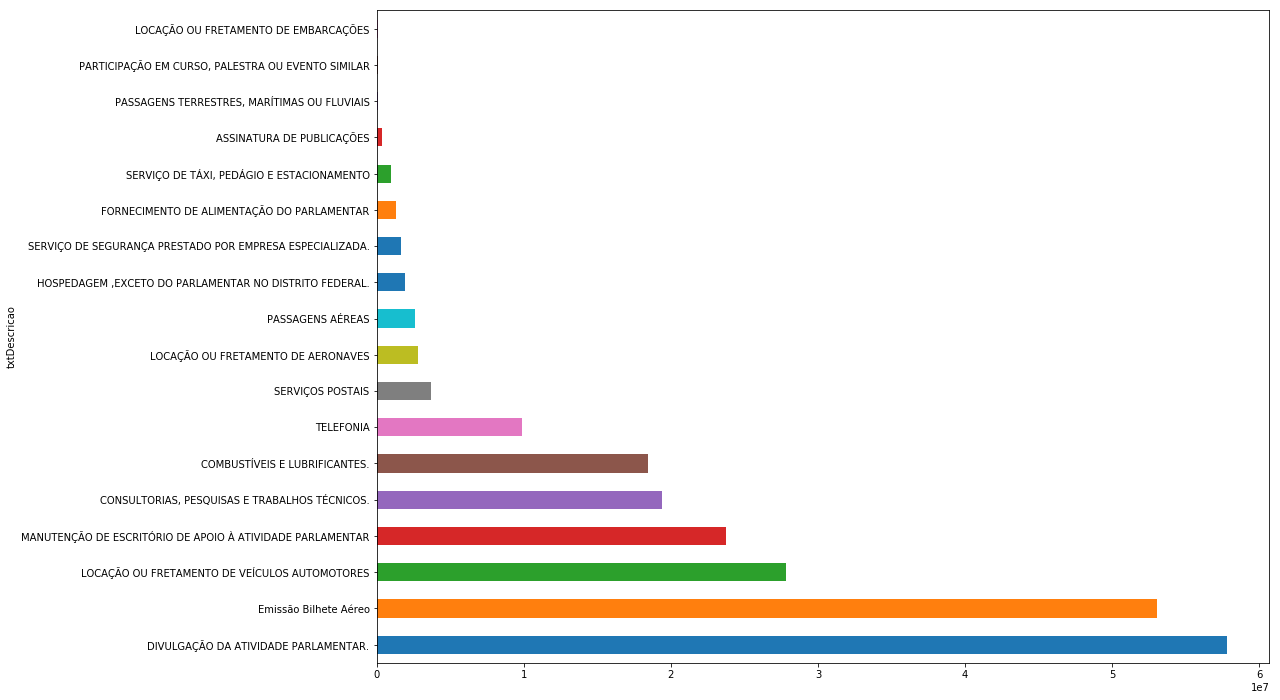

In [7]:
dtf.groupby(
    by=['txtDescricao'])['vlrLiquido'].sum().sort_values(ascending=False).plot(kind = 'barh',figsize=(16,12))

In [8]:
dtf.groupby(
    by=['txtDescricao'])['vlrLiquido'].sum().sort_values(ascending=False).head(10)

txtDescricao
DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.                         5.779436e+07
Emissão Bilhete Aéreo                                        5.301210e+07
LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES                2.783889e+07
MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR    2.373071e+07
CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.                1.938438e+07
COMBUSTÍVEIS E LUBRIFICANTES.                                1.845150e+07
TELEFONIA                                                    9.911319e+06
SERVIÇOS POSTAIS                                             3.672074e+06
LOCAÇÃO OU FRETAMENTO DE AERONAVES                           2.842802e+06
PASSAGENS AÉREAS                                             2.607145e+06
Name: vlrLiquido, dtype: float64

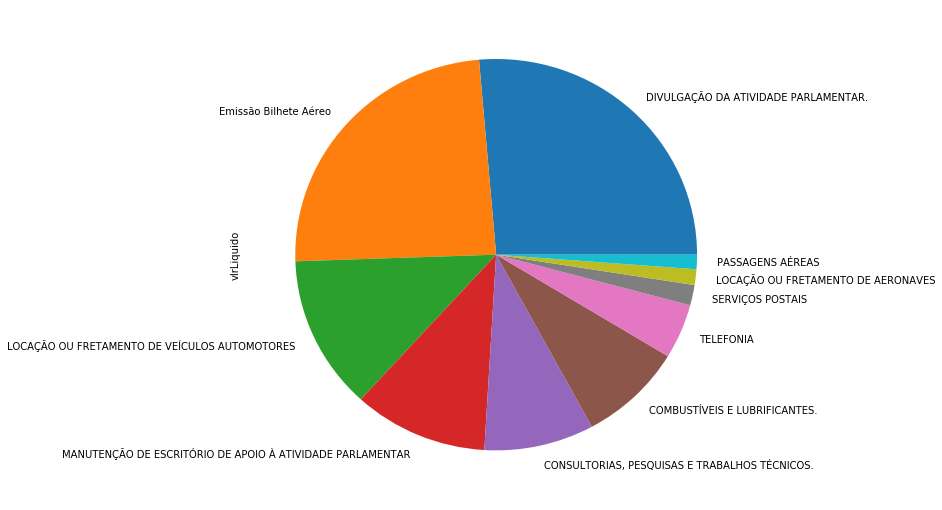

In [9]:
dtf.groupby(
    by=['txtDescricao'])['vlrLiquido'].sum().sort_values(ascending=False).head(10).plot(kind='pie', figsize=(9,9))

# Análise de Preposições

## Preparação do DataFrame de Preposições por Deputado

In [10]:
proposicoesa = pd.read_csv('proposicoesAutores-2017.csv', low_memory=False,delimiter=';', encoding='UTF-8', decimal=',')
proposicoesa.head()

,idProposicao,idAutor,uriAutor,codTipoAutor,nomeAutor,siglaPartidoAutor,uriPartidoAutor,siglaUFAutor
0,2120097,108368,https://dadosabertos.camara.leg.br/api/v2/depu...,Deputado,Marcus Vicente,PP,https://dadosabertos.camara.leg.br/api/v2/part...,ES
1,2122124,4736,NaN,Órgão do Poder Executivo,Poder Executivo,NaN,NaN,NaN
2,2122125,4736,NaN,Órgão do Poder Executivo,Poder Executivo,NaN,NaN,NaN
3,2122128,4736,NaN,Órgão do Poder Executivo,Poder Executivo,NaN,NaN,NaN
4,2122129,4736,NaN,Órgão do Poder Executivo,Poder Executivo,NaN,NaN,NaN


In [11]:
proposicoesa = proposicoesa['nomeAutor'].str.upper()
proposicoesb = pd.DataFrame(proposicoesa)
proposicoesb.head(15)

,nomeAutor
0,MARCUS VICENTE
1,PODER EXECUTIVO
2,PODER EXECUTIVO
3,PODER EXECUTIVO
4,PODER EXECUTIVO
5,PODER EXECUTIVO
6,PADRE JOÃO
7,WADIH DAMOUS
8,PAULO PIMENTA
9,REGINALDO LOPES


In [12]:
a = proposicoesb.groupby(['nomeAutor']).size().sort_values(ascending=False)
proposicoesautor = pd.DataFrame({'NOME': a.index, 'PROPOSIÇÕES':a.values})
proposicoesautor.head()

,NOME,PROPOSIÇÕES
0,VENEZIANO VITAL DO RÊGO,839
1,DR. SINVAL MALHEIROS,687
2,ERIKA KOKAY,368
3,RÔMULO GOUVEIA,363
4,CARLOS ZARATTINI,350


## Análises de Proposições por Deputado

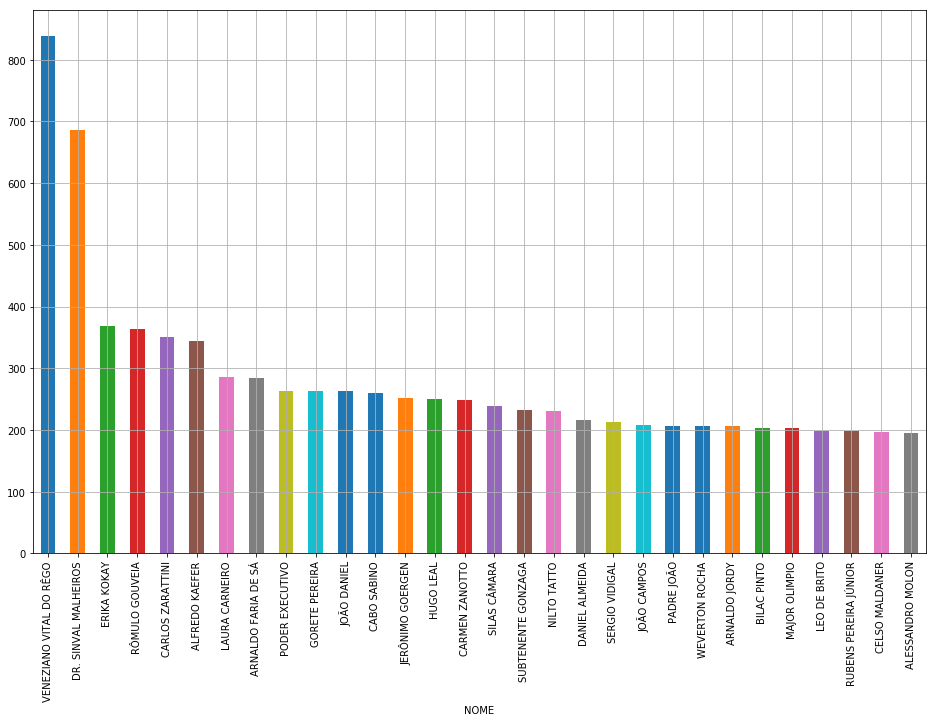

In [13]:
proposicoesautor.groupby(
    by=['NOME'])['PROPOSIÇÕES'].sum().sort_values(ascending=False).head(30).plot(kind='bar', figsize=(16,10), grid = True)

## Gasto por proposição

In [14]:
gastos = dtf['vlrLiquido'].sum()/len(proposicoesb)
print('{0:.2f}'.format(gastos) , "reais por proposição na câmara dos deputados")

4529.24 reais por proposição na câmara dos deputados


In [15]:
result = pd.merge(proposicoesautor, gastosDeputado, on='NOME', how='inner')

result.head(20)


,NOME,PROPOSIÇÕES,GASTOS
0,VENEZIANO VITAL DO RÊGO,839,513755.40
1,DR. SINVAL MALHEIROS,687,443109.67
2,ERIKA KOKAY,368,206442.02
3,RÔMULO GOUVEIA,363,541454.14
4,CARLOS ZARATTINI,350,455268.53
5,ALFREDO KAEFER,345,478802.33
6,LAURA CARNEIRO,286,441348.26
7,ARNALDO FARIA DE SÁ,285,159350.11
8,GORETE PEREIRA,264,518955.24
9,JOÃO DANIEL,263,480913.63


In [16]:
media = result['GASTOS']/result['PROPOSIÇÕES']
result['MEDIA'] = media
result.sort_values(['MEDIA'], ascending = False).head(15)

,NOME,PROPOSIÇÕES,GASTOS,MEDIA
523,OSMAR BERTOLDI,2,445857.43,222928.715000
525,VICENTE ARRUDA,1,160776.92,160776.920000
520,HERMES PARCIANELLO,3,442394.69,147464.896667
517,JOSÉ REINALDO,4,502747.43,125686.857500
518,RODRIGO MAIA,3,332326.19,110775.396667
515,VINICIUS GURGEL,6,531115.47,88519.245000
513,EDMAR ARRUDA,7,474594.98,67799.282857
512,IRMÃO LAZARO,8,460215.66,57526.957500
514,PEDRO VILELA,7,380431.50,54347.357143
510,CACÁ LEÃO,9,468462.88,52051.431111


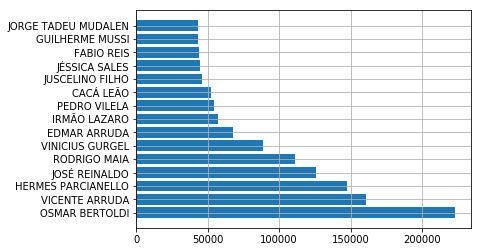

In [17]:
a = result.sort_values(['MEDIA'], ascending = False).head(15)
plt.barh(a['NOME'], a['MEDIA'])
plt.grid()
plt.show()

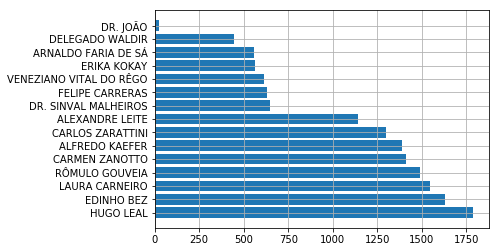

In [101]:
a = result.sort_values(['MEDIA'], ascending = True).head(15)
a = a.sort_values(['MEDIA'], ascending = False)
plt.barh(a['NOME'], a['MEDIA'])
plt.grid()
plt.show()

## Análise por mês dos gastos de 2017

### Criação de Dataframe com mês, descrição e valor líquido (Função)

In [69]:
df2017 = dtf[['txtDescricao','numMes','vlrLiquido']]

def create_TableDescription(df,ano):
    dfmeses = pd.DataFrame(df[df['numMes'] == 1].groupby(by=['txtDescricao'])['vlrLiquido'].sum())
    dfmeses['mes'] = 1
    dfmeses.head()
    for x in range(11):
        dfaux = pd.DataFrame(df[df['numMes'] == x+2].groupby(by=['txtDescricao'])['vlrLiquido'].sum())
        dfaux['mes'] = x+2
        frames=[dfmeses,dfaux]
        dfmeses = pd.concat(frames,sort=False)

    dfmeses = pd.DataFrame({'txtDescricao': dfmeses.index, 'vlrLiquido':dfmeses['vlrLiquido'], 'numMes': dfmeses['mes']})
    dfmeses.reset_index(drop = True, inplace = True)
    dfmeses['ano'] = ano
    return dfmeses

dfmeses2017 = create_TableDescription(df2017,2017)

dfmeses2017.groupby('txtDescricao').agg(['count','mean'])


vlrLiquido                \
                                                        count          mean   
txtDescricao                                                                  
ASSINATURA DE PUBLICAÇÕES                                  12  3.325527e+04   
COMBUSTÍVEIS E LUBRIFICANTES.                              12  1.537625e+06   
CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.              12  1.615365e+06   
DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.                       12  4.816197e+06   
Emissão Bilhete Aéreo                                      12  4.417675e+06   
FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR                 12  1.106535e+05   
HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO F...         12  1.597540e+05   
LOCAÇÃO OU FRETAMENTO DE AERONAVES                         12  2.369002e+05   
LOCAÇÃO OU FRETAMENTO DE EMBARCAÇÕES                       12  9.187044e+03   
LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES              12  2.319907e+06   
MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE P...         12  1.977559e+06   
PARTICIPAÇÃO EM CURSO, PALESTRA OU EVENTO SIMILAR          12  9.760992e+03   
PASSAGENS AÉREAS                                           12  2.172621e+05   
PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS                12  1.068135e+04   
SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPEC...         12  1.386230e+05   
SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO                  12  8.419164e+04   
SERVIÇOS POSTAIS                                           12  3.060061e+05   
TELEFONIA                                                  12  8.259432e+05   

                                                   numMes        ano        
                                                    count mean count  mean  
txtDescricao                                                                
ASSINATURA DE PUBLICAÇÕES                              12  6.5    12  2017  
COMBUSTÍVEIS E LUBRIFICANTES.                          12  6.5    12  2017  
CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.          12  6.5    12  2017  
DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.                   12  6.5    12  2017  
Emissão Bilhete Aéreo                                  12  6.5    12  2017  
FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR             12  6.5    12  2017  
HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO F...     12  6.5    12  2017  
LOCAÇÃO OU FRETAMENTO DE AERONAVES                     12  6.5    12  2017  
LOCAÇÃO OU FRETAMENTO DE EMBARCAÇÕES                   12  6.5    12  2017  
LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES          12  6.5    12  2017  
MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE P...     12  6.5    12  2017  
PARTICIPAÇÃO EM CURSO, PALESTRA OU EVENTO SIMILAR      12  6.5    12  2017  
PASSAGENS AÉREAS                                       12  6.5    12  2017  
PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS            12  6.5    12  2017  
SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPEC...     12  6.5    12  2017  
SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO              12  6.5    12  2017  
SERVIÇOS POSTAIS                                       12  6.5    12  2017  
TELEFONIA                                              12  6.5    12  2017

### Criação de gráfico teste para um mês

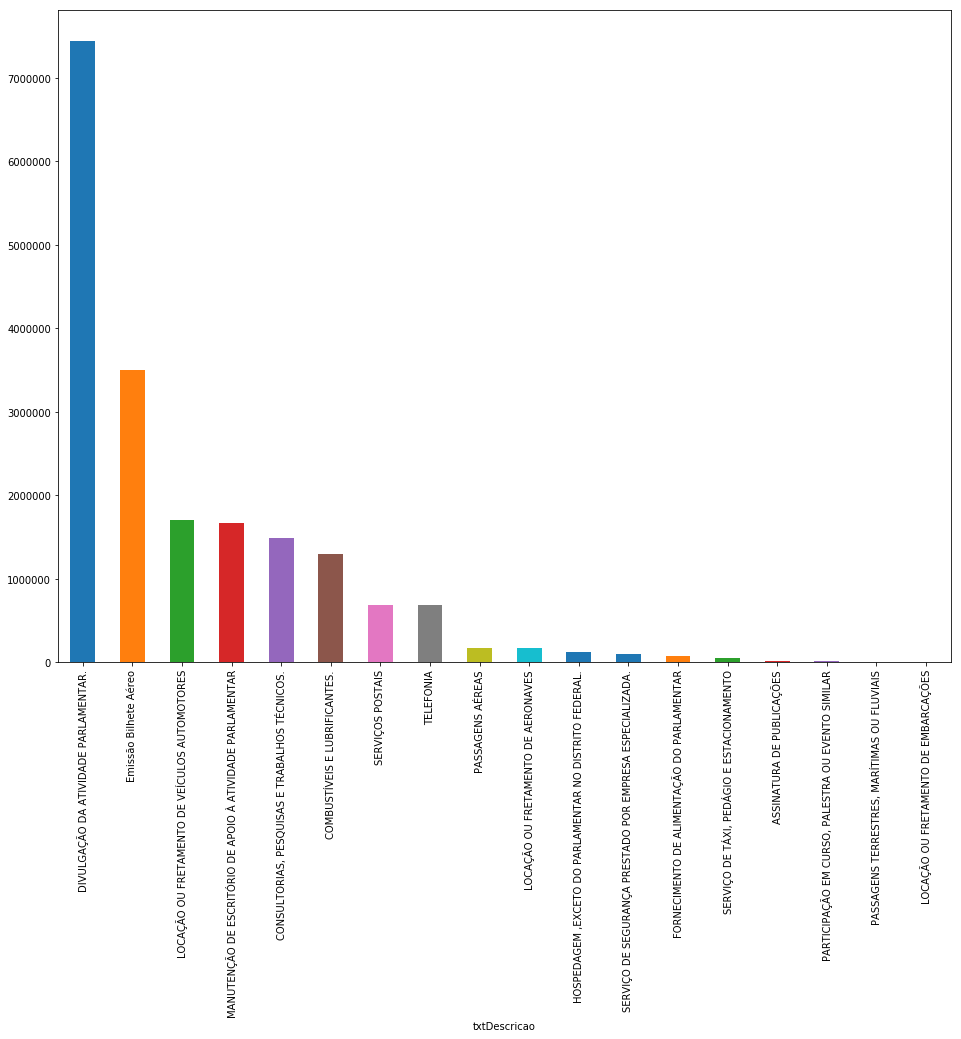

In [58]:
dfmeses2017[dfmeses2017['numMes']== 12].groupby(['txtDescricao'])['vlrLiquido'].sum().sort_values(ascending=False).plot(kind = 'bar',figsize=(16,12))


### Criação de gráfico por descrição de acordo com o mês

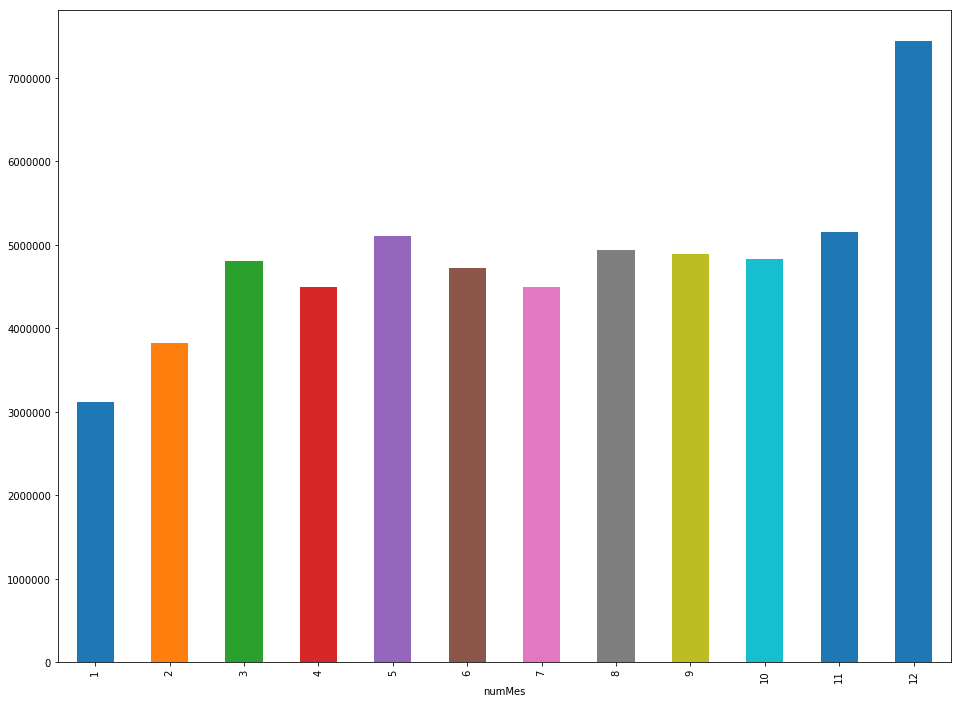

In [59]:
dfmeses2017[dfmeses2017['txtDescricao'] == 'DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.'].groupby(['numMes'])['vlrLiquido'].sum().plot(kind = 'bar',figsize=(16,12))    


# Utilização de outros anos na pesquisa

In [54]:
dtf1 = pd.read_csv('Ano-2014.csv', low_memory=False,delimiter=';', encoding='UTF-8', decimal=',')
dtf2 = pd.read_csv('Ano-2013.csv', low_memory=False,delimiter=';', encoding='UTF-8', decimal=',')

In [70]:
dfmeses2014 = create_TableDescription(dtf1,2014)
dfmeses2013 = create_TableDescription(dtf2,2013)

In [71]:
dfmeses2014.head()

,txtDescricao,vlrLiquido,numMes,ano
0,ASSINATURA DE PUBLICAÇÕES,8235.44,1,2014
1,COMBUSTÍVEIS E LUBRIFICANTES.,1190022.41,1,2014
2,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",1140708.28,1,2014
3,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,2833748.23,1,2014
4,Emissão Bilhete Aéreo,2084586.77,1,2014


### Análise por mês do gasto em Divulgação da Atividade Parlamentar em 2014

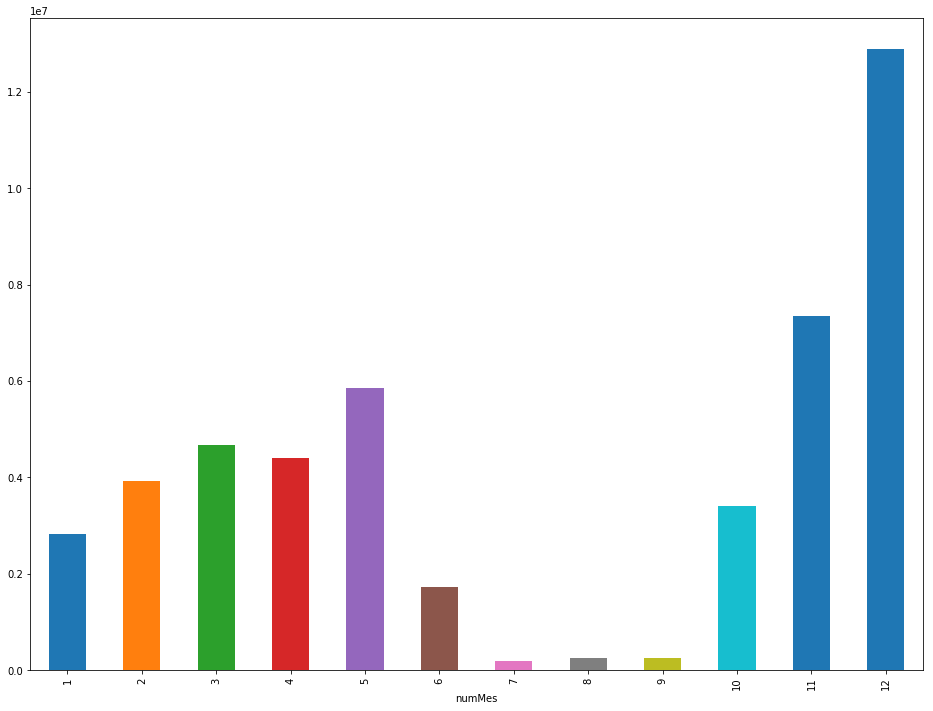

In [76]:
dfmeses2014[dfmeses2014['txtDescricao'] == 'DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.'].groupby(['numMes'])['vlrLiquido'].sum().plot(kind = 'bar',figsize=(16,12))    

### Análise por mês do gasto em Divulgação da Atividade Parlamentar em 2013

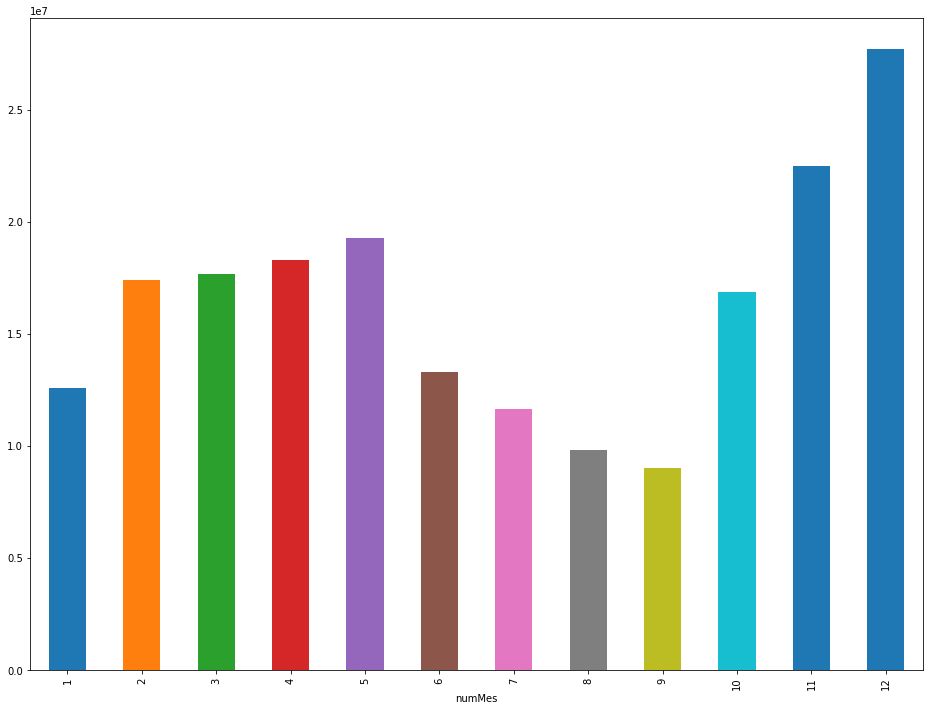

In [80]:
dfmeses2013[dfmeses2013['txtDescricao'] == 'DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.'].groupby(['numMes'])['vlrLiquido'].sum().plot(kind = 'bar',figsize=(16,12))    

In [ ]:
Análise por mês dos gastos totais 